# Data Visualization with Haberman Dataset

## About the data

The Haberman's survival dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

There are exactly four features in the data.They are:

1. Age of patient at time of operation (numerical)

2. Patient's year of operation (year - 1900, numerical)

3. Number of positive axillary nodes detected (numerical)

4. Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 years

## Objective

Our objective here is to perform an exploratory data analysis and understand the underlying patterns in the data that can further help us to predict whether a patient can survive or not. The question of interest here is, with the given features such as age, number of axillary nodes etc. is it possible to determine whether a patient can survive?

## Load the data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

haberman = pd.read_csv("haberman (1).csv")

## Understanding the data

In [119]:
print(haberman.shape)


(306, 4)


The data has a total of 306 observations and 4 features.

In [3]:
print(haberman.columns)

Index(['Age', 'year', 'positive_axillary_nodes', 'survival_status'], dtype='object')


In [12]:
#Assigning column names to variables for simplicity.
nodes=haberman["positive_axillary_nodes"]
survival=haberman["survival_status"]

To see the distribution of age.

In [75]:
print(haberman.describe().Age)


count    306.000000
mean      52.457516
std       10.803452
min       30.000000
25%       44.000000
50%       52.000000
75%       60.750000
max       83.000000
Name: Age, dtype: float64


This tells us that the data set contains observations of people between age group 30 to 80. The age is distributed around 50.

It does not make sense to find the five point summary of any other statistics.

In [9]:
survival.value_counts()

1    225
2     81
Name: survival_status, dtype: int64

Majority of the patients have survived post treatment. Also, this is an imbalanced dataset.

## Exploratory analysis

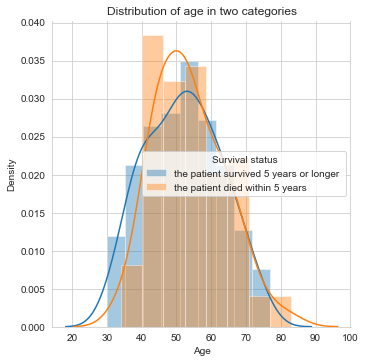

In [28]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman,hue="survival_status",height=5).map(sns.distplot,"Age")#.add_legend(title='Survival status', labels=['the patient survived 5 years or longer ','the patient died within 5 years');
plt.title("Distribution of age in two categories")
plt.ylabel("Density")
plt.legend(title='Survival status',  loc='center right',labels=['the patient survived 5 years or longer ','the patient died within 5 years'])
plt.show();

This plot is not extensively useful to categorize the survival status. The only information that can be extracted from this plot is that the people between age group 42-59 has a higher chance of death. 

Continueing the analysis with the other two variables.

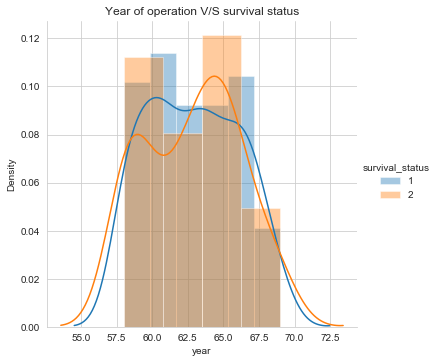

In [32]:
sns.FacetGrid(haberman,hue="survival_status",height=5).map(sns.distplot,"year").add_legend();
plt.title("Year of operation V/S survival status")
plt.ylabel("Density")
plt.show()

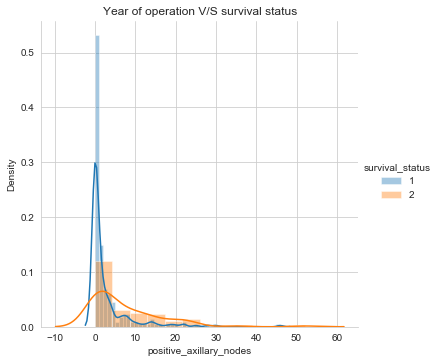

In [35]:
sns.FacetGrid(haberman,hue="survival_status",height=5).map(sns.distplot,"positive_axillary_nodes").add_legend();
plt.title("Year of operation V/S survival status")
plt.ylabel("Density")
plt.show()

In the two plots above, the two categories are overlapping and hence no useful information can be extracted from these plots.

Intutively, age should be a significant feature to decide a patients survival status. But, the univariate plot did not give relevant information. However, it may be important to visualize how the number of positive axillary nodes detected among age group is influencing the survival status. For this we can do pair plot, or scatter plots.

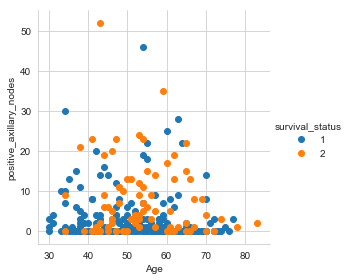

In [42]:
sns.FacetGrid(haberman, hue="survival_status", height=4).map(plt.scatter, "Age", "positive_axillary_nodes").add_legend();
plt.show();

There is no way we are able to separate the two classes. However much old a person is does not affect the survival status of a person whatever be the number of nodes detected. 

In [90]:
df=haberman[(haberman['Age'] > 60) & (haberman['positive_axillary_nodes'] >4) ]
df.sort_values(by=['survival_status'])

,Age,year,positive_axillary_nodes,survival_status
235,61,65,8,1
241,62,62,6,1
251,63,61,9,1
252,63,61,28,1
254,64,65,22,1
287,70,66,14,1
290,70,59,8,1
229,61,62,5,2
238,62,59,13,2
240,62,65,19,2


Here, we filtered the data to check the pattern of survivors. The pattern seems to be random.There were exceptional cases in which people who had more than 12 nodes survived. These happened in years 63 and 64. During the year 62, 65 and 66, a higher number of nodes resulted in death.

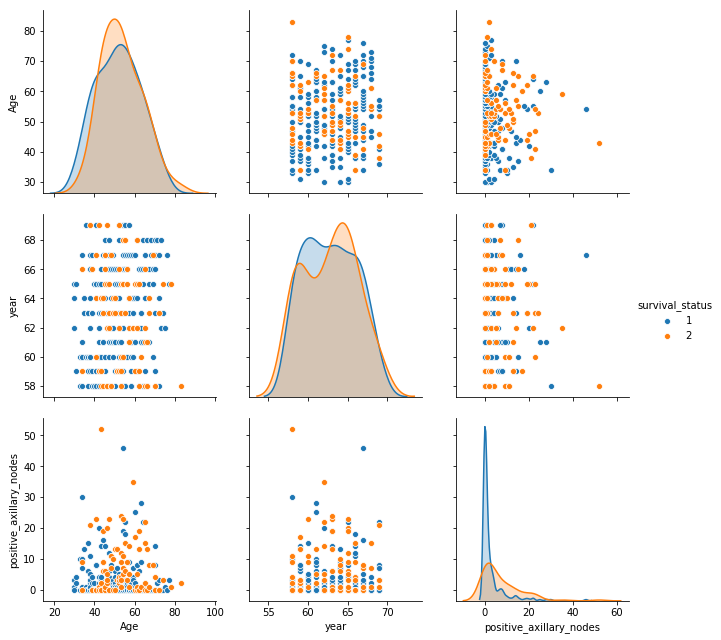

In [5]:
sns.pairplot(haberman, hue="survival_status", vars=["Age","year","positive_axillary_nodes"],height=3);
plt.show()

From this pair plot, one thing that can be confirmed is that the variables are not linearly seperable. 

One feature that can give minimal yet significant separation is number of axillary nodes detected when plotted against year.

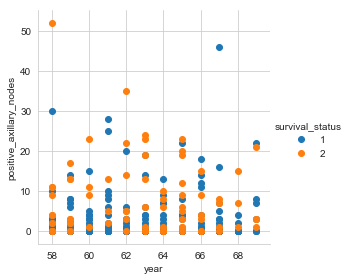

In [43]:
sns.FacetGrid(haberman, hue="survival_status", height=4).map(plt.scatter, "year", "positive_axillary_nodes").add_legend();
plt.show();

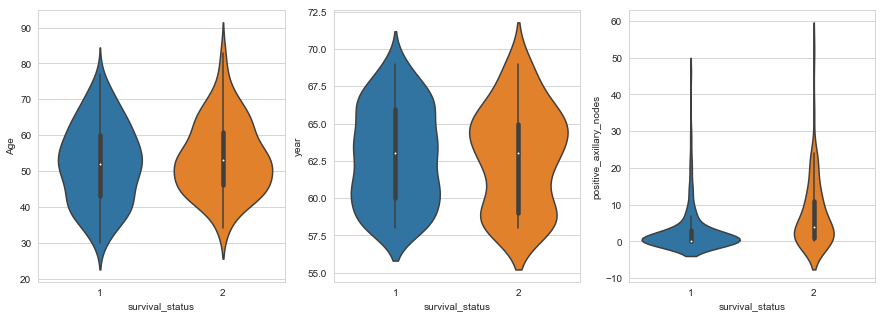

In [117]:
fig, axarr = plt.subplots(1, 3,figsize=(15, 5))
for (idx,feature) in enumerate(haberman.columns[:-1]):
    sns.violinplot(x="survival_status", y=feature, data=haberman,  ax = axarr[idx], size=8)
plt.show()

Violin plot seems to exhibit some pattern from which following conclusions can be drawn out:

1. The number of axillary nodes is one significant factor. The more, the lower the chances of the survival. 

2. More people died within 5 years for those whose operation was carried out in the year 65. The people who survied 5 years or longer remain almost similar throughout the years in the observation

3. The younger people are more likely to survive 5 years or longer. Patiets who are 50 years are less like to survive and patients who were 55 years old survived more than 5 years.

## Conclusions

1. The data is imbalanced

2. The data is not linearly separable

3. The feature positive_auxillary_nodes, which records the number of positive axillary nodes detected, seems to be a        significant influence in the survival of the patient. 

    3a. The people who survived more than 5 years had mostly the number of positive axillary nodes detected as zero.

    3b. The people who did not survive had 5-8 nodes (less than 10) (Observation from violin plot)

    3c. There were exceptional cases in which people who had more than 12 nodes survived. These happened in years 63 and 64.           During the year 62, 65 and 66, a higher number of nodes resulted in death. This pattern was evident after filtering           and grouping the dataset 


4. The year in which the operation was performed seems to be not so significant variable. However, in the year 65-68 majority   of the people died within 5 years.

5. Surprisingly, The age of the patient is not an essential criterion. However, among patients who survived more than 5 years,   the majority were 52-55 years, and of the patients who did not survive more than 5 years, the majority were 40-50 years of old.


